# Assignment 3 - Supervised Learning

## *Emma Sun*
Netid:  *xs58*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}= \frac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

In [163]:
%%bash
head data/A3_Q1_data.csv

x1,x2,y
2.553123949225399,0.3377567512313982,0.0
-0.8777570396020444,0.0457900230374364,1.0
-0.9035282276764125,0.3680762805049136,1.0
-1.5321517894067438,-0.8637366608868642,1.0
-0.04695350119398323,-0.3887607409094962,1.0
-0.021464257732829894,-1.555591362370738,0.0
-0.5025583659448056,-1.6438048270561167,1.0
2.026366212012205,1.134847469300135,0.0
-0.46922308242712085,-1.5747291775653531,1.0


In [165]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


a) Likelihood Function

$$ P(\mathbf y|\mathbf X) = \prod_{i=1}^{N} P(y_i = 1| \mathbf x_i)_{y_{i}} P[y_i = 0 | \mathbf x_i)]_{1-y_{i}}$$

$$= \prod_{i=1}^{N} \sigma(\mathbf{w}^T \mathbf{x}_i)_{y_{i}} \: [1 - \sigma(\mathbf{w}^T \mathbf{x}_i)]_{1-y_{i}}$$



b) Cost Function

$$ C(w) = \prod_{i=1}^{N} \sigma(\mathbf{w}^T \mathbf{x}_i)_{y_{i}} \: [1 - \sigma(\mathbf{w}^T \mathbf{x}_i)]_{1-y_{i}}$$

$$ \log C(w) = \log[\prod_{i=1}^{N} \sigma(\mathbf{w}^T \mathbf{x}_i)_{y_{i}} \: [1 - \sigma(\mathbf{w}^T \mathbf{x}_i)]_{1-y_{i}}]$$

Scaling the log C(w) by -1/N

$$\log C(w) = - \dfrac{1}{N} \sum_{i = 1}^{N} y_i \log(\sigma(\mathbf{w}^T \mathbf{x}_i))+ (1-y_i)\: \log(1-\sigma(\mathbf{w}^T \mathbf{x}_i)))$$

$$\log C(w) = - \dfrac{1}{N} \sum_{i = 1}^{N} y_i \log(\dfrac{1}{1+e^{-mx_i}}) + (1 - y_i)\: \log(\dfrac{e^{-mx_i}}{1+e^{-mx_i}})$$
​
$$ \log C(w) = - \dfrac{1}{N} \sum_{i = 1}^{N} y_i(\log(1) - \log(1+e^{-mx_i})) + (1 - y_i)\:(\log(e^{-mx_i}) - \log(1+e^{-mx_i})) $$

$$\log C(w) = - \dfrac{1}{N} \sum_{i = 1}^{N} \log(e^{-wx_i})(1-y_i) - (\log(1+e^{-wx_i}))$$
$$\log C(w) =  \dfrac{1}{N} \sum_{i = 1}^{N} wx_i(1-y_i) + (\log(1+e^{-wx_i}))$$


c) Gradient of Cost Function

$$\frac{\partial f}{\partial w} = \frac{\partial }{\partial w} \dfrac{1}{N} \sum_{i = 1}^{N}  wx_i(1-y_i) + (\log(1+e^{-wx_i}))$$

$$ =  \dfrac{1}{N} \sum_{i = 1}^{N} x_i(1-y_i) + \left( \frac{1}{1+e^{-wx_i}} e^{-wx_i} (-x_i)\right)$$

$$ = \dfrac{1}{N} \sum_{i = 1}^{N}  x_i(1-y_i) - (\frac{x_i e^{-wx_i}}{1+e^{-wx_i}})$$

$$ \frac{\partial f}{\partial w}=  \dfrac{1}{N} \sum_{i = 1}^{N}  x_i \left( (1-y_i)\:-\frac{ e^{-wx_i}}{1+e^{-wx_i}}\right)$$

$$=\dfrac{1}{N} \sum_{i=1}^N(1-y_i-(1-\sigma(\mathbf{w}^T\mathbf{x}_i)))\mathbf{x}_{i}$$

$$= \dfrac{1}{N}\sum_{i=1}^N(\sigma(\mathbf{w}^T\mathbf{x}_i)-y_i)\mathbf{x}_{i}$$

For $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$ = 

$$\big[\frac{\nabla (w)}{w_0} , 
\frac{\nabla (w)}{w_1} ,
\frac{\nabla (w)}{w_2} \big]$$

$$\begin{bmatrix} \dfrac{1}{N} \sum_{i = 1}^{N}((1-y_i)\:- \frac{e^{-w}}{1+e^{-w}} ), \\
 \dfrac{1}{N} \sum_{i = 1}^{N}   x_{i,1}\left((1-y_i)\:- \frac{e^{-wx_{i,1}}}{1+e^{-wx_{i,1}}}\right) , \\
 \dfrac{1}{N} \sum_{i = 1}^{N}  x_{i,2}\left((1-y_i)\: - \frac{e^{-wx_{i,2}}}{1+e^{-wx_{i,2}}}\right) \end{bmatrix}$$

d) Learning Rate
$$\mathbf{w} = \mathbf{w} - \eta\nabla_{}C(\mathbf{w}) = \mathbf{w} - \eta\sum_{i=1}^N(\sigma(\mathbf{w}^T\mathbf{x}_i)-y_i)\mathbf{x}_{i}$$



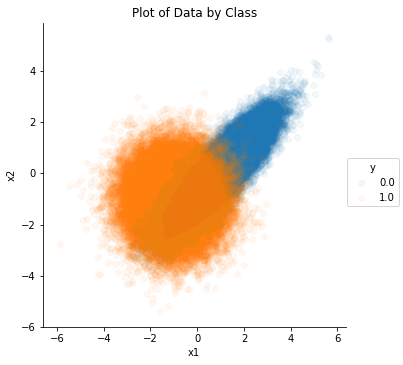

In [656]:
# e) EDA with data
import seaborn as sns
df = pd.read_csv('data/A3_Q1_data.csv')
sns.lmplot('x1','x2',data=df, hue='y',fit_reg=False, scatter_kws={'alpha':0.05})
#plt.scatter(df.x1, df.x2, c = df.y,alpha=0.1)
plt.title('Plot of Data by Class')
plt.xlabel("x1")
plt.ylabel('x2')
pass

The data doesn't seem to be easily separable as data of different classes are mostly mixed together and overlap with each other. Logistic regression thus may not be a good fit. The separation boundary seems like a non-linear one, so maybe through transformations, the performance of logistic model will not be too bad.

In [167]:
df.describe()

,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


In [168]:
# there's no NA value for all variables
df.isna().all() 

x1    False
x2    False
y     False
dtype: bool

f) Based on description of the dataset, there's no obvious outlier detected. Both min and max for x1 and x2 are within similar ranges. The two results of y are equally distributed. The scale for x1 and x2 are similar too. Moreover, there's no missing value. Therefore, I don't think we need any transformation of the dataset.

In [169]:
#g) implement logistic function

def sigmoid(w,x):
    """returns probability of success given parameter vector w and observation x vector as input"""
    wx = np.dot(w,x)
    return 1 / (1 + np.exp(-wx))

In [170]:
#test logistic function

#extract features and response from pandas dataframe
x = np.array(df[['x1','x2']])
y = np.array(df['y']).reshape(1,-1)

#reshape feature matrix. Add one row of 1 for w0 intercept
x_T = x.T
row_one = np.ones((1,x.shape[0]))
x_T = np.r_[row_one, x_T]

#randomly generate weight for parameter metrics
w = np.random.random((1,3))
print("x_T:\n", x_T)
print("w:\n", w)

#test logistic function
prob = sigmoid(w, x_T)
print("prob:\n",prob)



x_T:
 [[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [ 2.55312395 -0.87775704 -0.90352823 ...  0.75873503  2.42735874
  -3.12557504]
 [ 0.33775675  0.04579002  0.36807628 ... -0.12728608 -0.2631311
  -1.11412784]]
w:
 [[0.99122832 0.36780205 0.22682113]]
prob:
 [[0.88151785 0.66346493 0.67751963 ... 0.77581134 0.86108514 0.39865503]]


In [171]:
print(y)

[[0. 1. 1. ... 0. 0. 1.]]


In [172]:
#h) implement cost function
def cost(N,y,prob):
    """returns likelihood given number of observation N, response vector y, and probability for each observation prob as input"""
    return -1/N* np.sum(y * np.log(prob) + (1-y)* np.log(1-prob))

    #return -1/N * np.sum(y * np.log(prob) + (1-y)* np.log(1-prob))    


In [173]:
#test cost function
loss = cost(x.shape[0], y, prob)
loss

1.1081389866834213

In [174]:
#i) separate test and training data

train=df.sample(frac=0.7,random_state=200)
test=df.drop(train.index)


In [175]:
# define a function to put data in good format
def dataformat(dfnew):
    """return tidied up response and feature matrix from given df"""
    xnew = np.array(dfnew[['x1','x2']])
    ynew = np.array(dfnew['y']).reshape(1,-1)


    x_T_new = xnew.T
    row_one = np.ones((1,xnew.shape[0]))
    x_T_new = np.r_[row_one, x_T_new]
    
    return x_T_new, ynew

    

In [176]:
#implement gradient descent
def graddes(x, w, y, lr):
    
    "performs gradient descent based on learning rate lr"
    wshape = w.shape
    w = np.random.random(wshape)
    wold = w
    wnew = w
    dist = 1
    iteration = 0
    sig = 0

    
    wset = []
    
    while dist > 10e-6:
        wold = wnew
        sig = sigmoid(wold,x)
        grad = np.dot((sig - y), x.T)/x.shape[1]
        wnew = wold - lr * grad
        dist = np.linalg.norm(wnew - wold)
        #iteration = iteration + 1
        #loss = cost(x.shape[1], y, sig)
        #print("Iteration", iteration)
        #print(wnew)
        #print("Cost is", loss)
        wset.append(wnew)
    
    return wset
        
    
    

In [177]:
#j) function to print out cost function for each w estimate
def printcost(wset, xtest, ytest):
    iteration = 0
    costs = []
    for each in wset:
        costs.append(cost(xtest.shape[1], ytest, sigmoid(each, xtest)))
        
    return costs
        
        

In [178]:
para = graddes(x_T, w, y, 0.1)[-1]
print(para[-1])
probtest = sigmoid(para, x_T)
print(probtest)

[-0.18531273 -1.92419398 -0.41889135]
[[0.00527493 0.81524846 0.80203577 ... 0.16911013 0.00861329 0.99815899]]


In [180]:
#train the training set using learning rate at 0.25
x_T_train, y_train = dataformat(train)
x_T_test, y_test = dataformat(test)
w_025lr = graddes(x_T_train, w, y_train, 0.25)
train_025_costs = printcost(w_025lr, x_T_train, y_train)
test_025_costs = printcost(w_025lr, x_T_test, y_test)



#print(train_025_costs)
#print('-'*50)
#print(test_025_costs)



In [181]:
#train the training set using learning rate at 0.5
x_T_train, y_train = dataformat(train)
w_05lr = graddes(x_T_train, w, y_train, 0.5)
train_05_costs = printcost(w_05lr, x_T_train, y_train)
test_05_costs = printcost(w_05lr, x_T_test, y_test)


In [182]:
#train the training set using learning rate at 0.75
x_T_train, y_train = dataformat(train)
w_075lr = graddes(x_T_train, w, y_train, 0.75)
train_075_costs = printcost(w_075lr, x_T_train, y_train)
test_075_costs = printcost(w_075lr, x_T_test, y_test)



In [183]:
#train the training set using learning rate at 10
x_T_train, y_train = dataformat(train)
w_10lr = graddes(x_T_train, w, y_train, 10)
train_10_costs = printcost(w_10lr, x_T_train, y_train)
test_10_costs = printcost(w_10lr, x_T_test, y_test)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


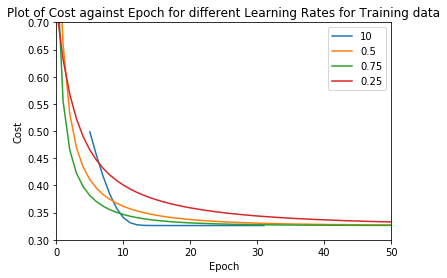

In [184]:
#k)
plt.plot(train_10_costs, label ='10')
plt.plot(train_05_costs, label = '0.5')
plt.plot(train_075_costs, label = '0.75')
plt.plot(train_025_costs, label ='0.25')
plt.legend()
plt.xlim(0,50)
plt.ylim(0.3,0.7)
plt.title('Plot of Cost against Epoch for different Learning Rates for Training data')
plt.xlabel('Epoch')
plt.ylabel('Cost')
pass


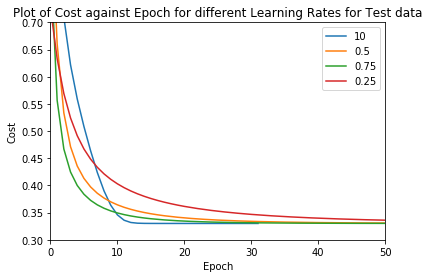

In [185]:
plt.plot(test_10_costs, label ='10')
plt.plot(test_05_costs, label = '0.5')
plt.plot(test_075_costs, label = '0.75')
plt.plot(test_025_costs, label ='0.25')
plt.legend()
plt.xlim(0,50)
plt.ylim(0.3,0.7)
plt.title('Plot of Cost against Epoch for different Learning Rates for Test data')
plt.xlabel('Epoch')
plt.ylabel('Cost')
pass


1. What is the impact that each parameter has on the process and the results? 
Learning rate is affecting the rate at which cost decreases. As we can see from the graphs, cost decreases at the faster rate as learning rate increases. 

2. What choices did you make in your chosen approach and why? 
I decided to choose learning rate at 0.5 as my preferred learning rate. This is because when learning rate is too fast, the amount of movement every time may be too big to catch the minimum point, thus unable to converge. However, if the learning rate is too small, it will make the program run very slowly. 

Therefore I choose 0.5 as the learning rate for the remainder of the question.

In [186]:
#l) Cross-validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle = True)
w = np.random.random((1,3))

prediction_scores = np.empty(y_train.squeeze().shape[0],dtype='object')

# X has to have rows - observation, columns - variables, y - 1D
for train_index, val_index in skf.split(x_T_train.T, y_train.squeeze()):
    x_sub_train, x_sub_val = x_T_train.T[train_index], x_T_train.T[val_index]
    y_sub_train = y_train.squeeze()[train_index]
    
    x_sub_train = x_sub_train.T
    x_sub_val = x_sub_val.T
    
    y_sub_train = y_sub_train.reshape(1,-1)

    
    #train and get the w
    w_train = graddes(x_sub_train, w, y_sub_train, 0.5)
    
    #predit for test set using w_train
    pred = sigmoid(w_train[-1], x_sub_val)
    prediction_scores[val_index] = pred[0,:]
    

  
    





/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


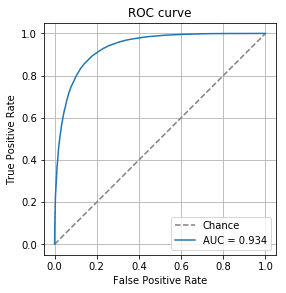

In [187]:
#Plot ROC Curve
import sklearn.metrics as metrics
fpr, tpr, _ = metrics.roc_curve(y_train.squeeze(), prediction_scores, pos_label=1)
auc = metrics.roc_auc_score(y_train.squeeze(), prediction_scores)
legend_string = 'AUC = {:0.3f}'.format(auc)
   
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
plt.plot(fpr, tpr, label=legend_string)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.legend()
plt.tight_layout()
plt.title('ROC curve')
pass

m) What's the significance of cross-validation?

Cross Validation is used to assess the predictive performance of the models and and to judge how they perform outside the sample to a new data set also known as test data. 

This is because when we fit a model, we are fitting it to a training dataset. Without cross validation we only have information on how does our model perform to our in-sample data. Ideally we would like to see how does the model perform when we have a new data in terms of accuracy of its predictions. 

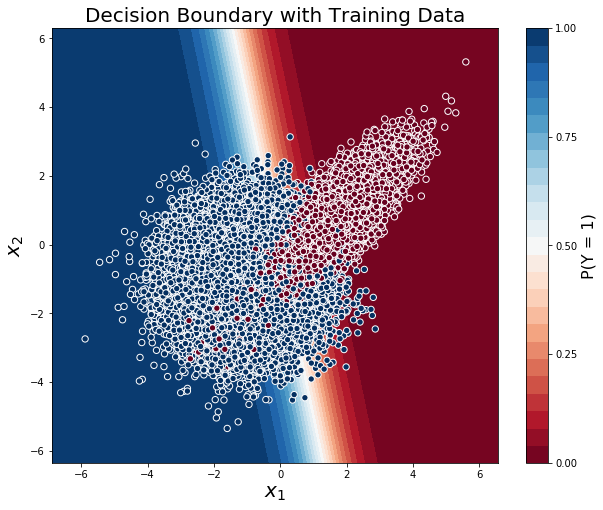

In [227]:
#n) Plot for training dataset

h = 0.02
#for training set 1


x1_min_1, x1_max_1 = x_T_train.T[:, 1].min() - 1, x_T_train.T[:, 1].max() + 1
x2_min_1,x2_max_1 = x_T_train.T[:, 2].min() - 1, x_T_train.T[:, 2].max() + 1
xx1, yy1 = np.meshgrid(np.arange(x1_min_1, x1_max_1, h), np.arange(x2_min_1, x2_max_1, h))
grid_x = np.c_[np.ones(xx1.ravel().shape[0]),xx1.ravel(), yy1.ravel()].T
    
#predit for test set using w_train for 0.5 learning rate
pred_grid = sigmoid(w_05lr[-1], grid_x)

pred_grid = pred_grid.reshape((xx1.shape))

plt.figure(figsize=(10,8))
con = plt.contourf(xx1,yy1,pred_grid,25,cmap="RdBu", vmin = 0, vmax = 1)
cbar = plt.colorbar(con)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1.0])
cbar.set_label("P(Y = 1)", fontsize=16)
plt.title("Decision Boundary with Training Data", fontsize=20)
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)

plt.scatter(x_T_train.T[:,1], x_T_train.T[:,2], c = y_train.squeeze(), s=40, cmap="RdBu", linewidth=1,edgecolor='white')


plt.show()



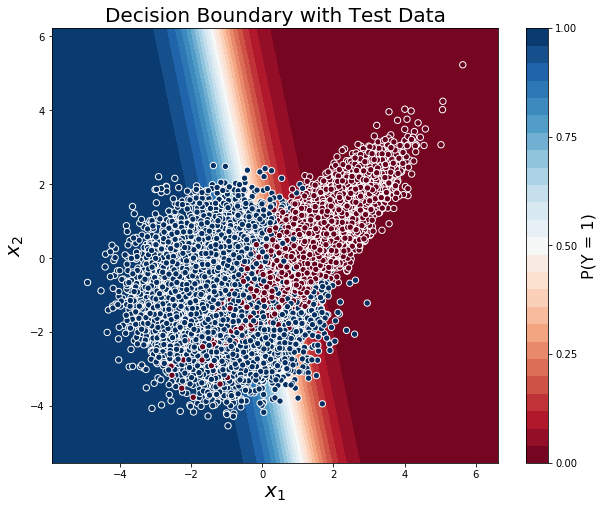

In [230]:
#n) Plot for testing dataset

h = 0.02
#for training set 1


x1_test_min_1, x1_test_max_1 = x_T_test.T[:, 1].min() - 1, x_T_test.T[:, 1].max() + 1
x2_test_min_1,x2_test_max_1 = x_T_test.T[:, 2].min() - 1, x_T_test.T[:, 2].max() + 1
xx1_test, yy1_test = np.meshgrid(np.arange(x1_test_min_1, x1_test_max_1, h), np.arange(x2_test_min_1, x2_test_max_1, h))
grid_x_test = np.c_[np.ones(xx1_test.ravel().shape[0]),xx1_test.ravel(), yy1_test.ravel()].T
    
#predit for test set using w_train for 0.5 learning rate
pred_grid_test = sigmoid(w_05lr[-1], grid_x_test)

pred_grid_test = pred_grid_test.reshape((xx1_test.shape))

plt.figure(figsize=(10,8))
con_test = plt.contourf(xx1_test,yy1_test,pred_grid_test,25,cmap="RdBu")
cbar_test = plt.colorbar(con_test)
cbar_test.set_ticks([0, 0.25, 0.5, 0.75, 1.0])
cbar_test.set_label("P(Y = 1)", fontsize=16)
plt.title("Decision Boundary with Test Data", fontsize=20)
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)

plt.scatter(x_T_test.T[:,1], x_T_test.T[:,2], c = y_test.squeeze(), s=40, cmap="RdBu", linewidth=1,edgecolor='white')


plt.show()




The decision boundary is a linear one which is not very ideal for this dataset, as the dataset is better separated by a non-linear boundary. We can do it through transforming x1 and x2 such as square x1 and x2.

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


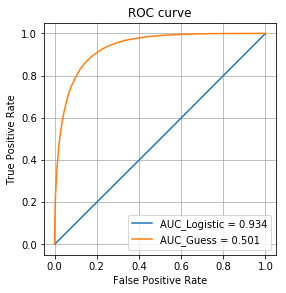

In [246]:
fpr_diag, tpr_diag, _diag = metrics.roc_curve(y_train.squeeze(), np.random.randint(2,size = prediction_scores.shape[0]), pos_label=1)


auc_log = metrics.roc_auc_score(y_train.squeeze(), prediction_scores)
legend_string_log = 'AUC_Logistic = {:0.3f}'.format(auc_log)

auc_guess = metrics.roc_auc_score(y_train.squeeze(), np.random.randint(2,size = prediction_scores.shape[0]))
legend_string_guess = 'AUC_Guess = {:0.3f}'.format(auc_guess)
                                              
plt.plot(fpr_diag, tpr_diag, label=legend_string_log)
plt.plot(fpr,tpr,label = legend_string_guess)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.legend()
plt.tight_layout()
plt.title('ROC curve')
pass

The AUC of logistic model's ROC curve is 0.934, which is bigger than AUC of the random guess model. Therefore, my logistic model performs better than the random guess model. 

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

In [248]:
# a)

#load in data
from mnist import MNIST
mndata = MNIST(path = './Assignment_3_data/')
train_img, train_label = mndata.load_training()
test_img, test_label = mndata.load_testing()


In [249]:
print(len(train_img))
print(len(train_label))
print(len(test_img))
print(len(test_label))

60000
60000
10000
10000


In [250]:
#convert data objects into numpy arrays
train_img = np.array(train_img)
train_label = np.array(train_label)
test_img = np.array(test_img)
test_label = np.array(test_label)

#reshape each image array to 28*28
train_img = train_img.reshape(60000,28,28)
test_img = test_img.reshape(10000,28,28)

#convert label into binary, there are 6131 images of digit 3 in training data, 1010 images of digit 3 in test data
train_label_new = np.where(train_label == 3, 1, 0)
print(sum(train_label_new))

test_label_new = np.where(test_label == 3, 1, 0)
print(sum(test_label_new))



6131
1010


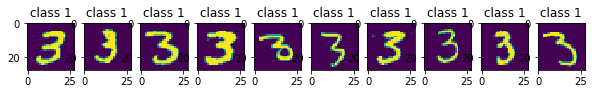

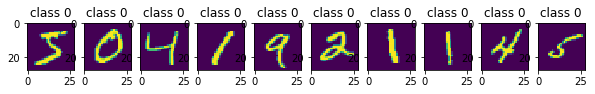

In [261]:
# b) Plot 10 examples of class 1 and 0 respectively
train_image_1 = train_img[train_label_new == 1][0:10]
train_image_0 = train_img[train_label_new == 0][0:10]


fig1, axes1 = plt.subplots(1,10, figsize=(10,10))
fig2, axes2 = plt.subplots(1,10,figsize=(10,10))

for i in range(10):
    axes1[i].set_title('class {}'.format(1))
    axes1[i].imshow(train_image_1[i])

for i in range(10):
    axes2[i].set_title('class {}'.format(0))
    axes2[i].imshow(train_image_0[i])


In [252]:
# c)
from collections import Counter
Counter(train_label_new)


Counter({0: 53869, 1: 6131})

Classes are not balanced. The number of images of non-3 digits are almost 8 times of the number of images of digit 3. The possible impact is that the predictions for infrequent categories may have low precision/wide confidence intervals.

In [267]:
print(train_img.shape)
print(train_label_new.shape)
train_img_2D = train_img.reshape(60000,-1)
print(train_img_2D.shape)

(60000, 28, 28)
(60000,)
(60000, 784)


In [271]:
# d) 
from sklearn.linear_model import LogisticRegression
ClassifierLog = LogisticRegression(random_state=323, solver='lbfgs', max_iter=200)
prediction_scores = np.empty(train_label_new.shape[0],dtype='object')

skf = StratifiedKFold(n_splits=3, shuffle = True)

# X has to have rows - observation, columns - variables, y - 1D
for train_index, val_index in skf.split(train_img_2D, train_label_new):
    x_train, x_val = train_img_2D[train_index], train_img_2D[val_index]
    y_train = train_label_new[train_index]
    
    # Train the classifier
    
    LogDigit = ClassifierLog.fit(x_train,y_train)
        
    # Test the classifier on the validation data for this fold
    cpred = ClassifierLog.predict_proba(x_val)
        
    # Save the predictions for this fold
    prediction_scores[val_index] = cpred[:,1]

    


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


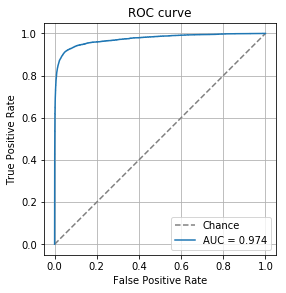

In [272]:
# Plot ROC Curve

fpr, tpr, _ = metrics.roc_curve(train_label_new, prediction_scores, pos_label=1)
auc = metrics.roc_auc_score(train_label_new, prediction_scores)
legend_string = 'AUC = {:0.3f}'.format(auc)
   
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
plt.plot(fpr, tpr, label=legend_string)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.legend()
plt.tight_layout()
plt.title('ROC curve')
pass


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


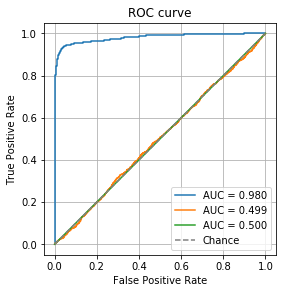

In [286]:
#train-test and ROC Curve

test_img_2D = test_img.reshape(10000,-1)

LogDigit_train = ClassifierLog.fit(train_img_2D,train_label_new)

prediction = ClassifierLog.predict_proba(test_img_2D)[:,1]

y_random = np.random.random(10000)
y_neg = np.zeros(10000)

fprlog, tprlog, _ = metrics.roc_curve(test_label_new, prediction, pos_label=1)
auclog = metrics.roc_auc_score(test_label_new, prediction)
legend_string_log = 'AUC_Logistics = {:0.3f}'.format(auclog)

fprran, tprran, _ = metrics.roc_curve(test_label_new, y_random, pos_label=1)
aucran = metrics.roc_auc_score(test_label_new, y_random)
legend_string_ran = 'AUC_RandomGuess = {:0.3f}'.format(aucran)

fprneg, tprneg, _ = metrics.roc_curve(test_label_new, y_neg, pos_label=1)
aucneg = metrics.roc_auc_score(test_label_new, y_neg)
legend_string_neg = 'AUC_AlwaysNegative = {:0.3f}'.format(aucneg)


plt.plot(fprlog, tprlog, label=legend_string_log)
plt.plot(fprran, tprran, label=legend_string_ran)
plt.plot(fprneg,tprneg,label=legend_string_neg)

    
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.legend()
plt.tight_layout()
plt.title('ROC curve')
pass



/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


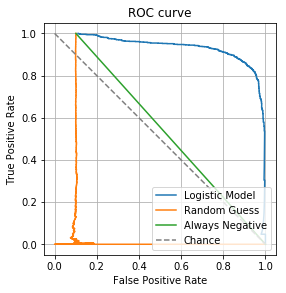

In [293]:
#Plot PR curves
fprlog, tprlog, _ = metrics.precision_recall_curve(test_label_new, prediction, pos_label=1)
legend_string_log = 'Logistic Model'

fprran, tprran, _ = metrics.precision_recall_curve(test_label_new, y_random, pos_label=1)
legend_string_ran = 'Random Guess'

fprneg, tprneg, _ = metrics.precision_recall_curve(test_label_new, y_neg, pos_label=1)
legend_string_neg = 'Always Negative'


plt.plot(fprlog, tprlog, label=legend_string_log)
plt.plot(fprran, tprran, label=legend_string_ran)
plt.plot(fprneg,tprneg,label=legend_string_neg)

    
plt.plot([0,1],[1,0],'--', color='gray', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.legend(loc = 4)
plt.tight_layout()
plt.title('ROC curve')
pass

From both ROC and PR curve, the area under the curve for logistic model is the largest comparing with the other 2. Therefore, it can be concluded that the logistic model performs better than the 2 models.

In [690]:
#f)
from sklearn.metrics import f1_score, roc_auc_score
def logit_lasso(C, test, label):
    coef_count = []
    cost = []
    f1_binary = []
    auc = []
    cnt = 0
    
    for c in C:
        cnt += 1
        ClassifierPenal = LogisticRegression(penalty='l1', random_state=323, C = c)
        penal = ClassifierPenal.fit(train_img_2D, train_label_new)
        pred_label = penal.predict(test)
        pred_proba = penal.predict_proba(test)
        coef_count.append(np.sum(np.isclose(penal.coef_, 0)))
        cost.append(-np.sum(np.log(pred_proba**np.c_[1-label, label]))/label.shape)
        f1_binary.append(f1_score(label, pred_label, pos_label=1))
        auc.append(roc_auc_score(label, pred_proba[:,1]))
    return 28*28-np.array(coef_count), cost, f1_binary, auc

In [691]:
C = np.logspace(3,-5,25)
result_stats = logit_lasso(C, test_img_2D, test_label_new)

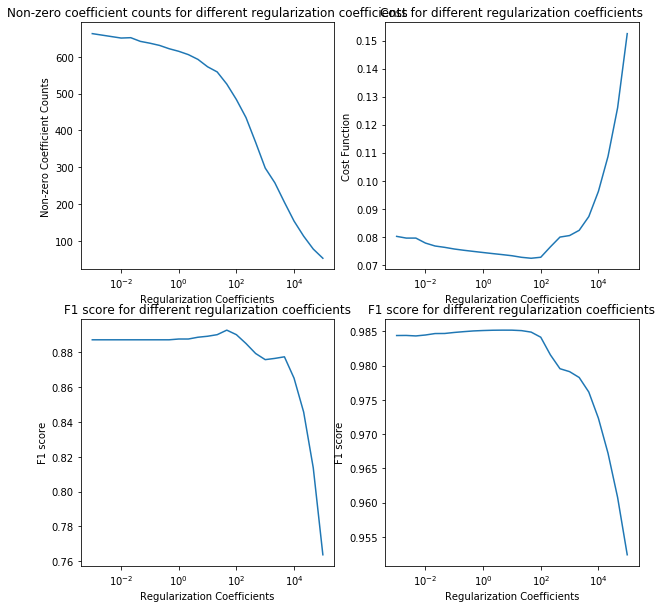

In [692]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

names = ["Non-zero Coefficient Counts", "Cost Function", "F1-score", "Aear Under Curve of ROC"]

axes[0][0].plot(C**(-1), result_stats[0],'-')
axes[0][0].set_xscale('log')
axes[0][0].set_title('Non-zero coefficient counts for different regularization coefficients')
axes[0][0].set_xlabel("Regularization Coefficients")
axes[0][0].set_ylabel('Non-zero Coefficient Counts')

axes[0][1].plot(C**(-1), result_stats[1],'-')
axes[0][1].set_xscale('log')
axes[0][1].set_title('Cost for different regularization coefficients')
axes[0][1].set_xlabel("Regularization Coefficients")
axes[0][1].set_ylabel('Cost Function')

axes[1][0].plot(C**(-1), result_stats[2], '-')
axes[1][0].set_xscale('log')
axes[1][0].set_title('F1 score for different regularization coefficients')
axes[1][0].set_xlabel("Regularization Coefficients")
axes[1][0].set_ylabel('F1 score')

axes[1][1].plot(C**(-1),result_stats[3],'-')
axes[1][1].set_xscale('log')
axes[1][1].set_title('F1 score for different regularization coefficients')
axes[1][1].set_xlabel("Regularization Coefficients")
axes[1][1].set_ylabel('F1 score')

plt.show()

When the regularization coefficients increase, the number of non-zero parameters decreases. This shows that the dimension of feature is decreasing. However, the value of cost decreases first and then increases dramatically. The f1-score and AUC of ROC first increase and decrease dramatically.

This means that an appropriate value of regularization could improve the performance of model by reducing dimension of features. However, after reaching some turning point, extreme regularization could harm the prediction because it shrink some useful features to zero.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

a) Question: Predict the probability on whether a customer will instantly like a deodorant based on a number of features of the deodorant. I find this research question interesting as I think it can potentially help the deodorant companies predict whether their new product will be liked by their customers. 

In [608]:
#b) Download Data and Describe it
deodf = pd.read_csv('./Assignment_3_data/Data_train_reduced.csv', na_values='NaN')
print('shape of deodorant dataset is {}'.format(deodf.shape))
deodf.describe()

shape of deodorant dataset is (2500, 64)


,Respondent.ID,Product.ID,Instant.Liking,q1_1.personal.opinion.of.this.Deodorant,q2_all.words,q3_1.strength.of.the.Deodorant,q4_1.artificial.chemical,q4_2.attractive,q4_3.bold,q4_4.boring,...,ValSegb,s7.involved.in.the.selection.of.the.cosmetic.products,s8.ethnic.background,s9.education,s10.income,s11.marital.status,s12.working.status,s13.2,s13a.b.most.often,s13b.bottles.of.Deodorant.do.you.currently.own
count,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,...,2500.000000,2500.0,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,8249.500000,460.400000,0.24720,5.129600,1.121200,3.344400,2.500000,3.71680,3.546000,2.241600,...,3.522400,4.0,1.665200,3.199200,4.996000,1.742000,1.898000,0.025296,0.038400,3.072000
std,3433.008516,308.412528,0.43147,1.481918,0.934055,0.743243,1.384618,1.27548,1.261951,1.242838,...,1.964241,0.0,1.036889,0.970307,2.371125,0.726944,1.440426,0.104856,0.192198,1.620082
min,3800.000000,121.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,4.0,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,5324.750000,230.000000,0.00000,5.000000,0.000000,3.000000,1.000000,3.00000,3.000000,1.000000,...,2.000000,4.0,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.000000
50%,8249.500000,344.000000,0.00000,5.000000,1.000000,3.000000,2.000000,4.00000,4.000000,2.000000,...,3.000000,4.0,1.000000,3.000000,4.000000,2.000000,1.000000,0.000000,0.000000,3.000000
75%,9774.250000,633.000000,0.00000,6.000000,2.000000,4.000000,4.000000,5.00000,5.000000,3.000000,...,5.000000,4.0,2.000000,4.000000,7.000000,2.000000,2.000000,0.000000,0.000000,4.000000
max,14099.000000,974.000000,1.00000,7.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,...,7.000000,4.0,5.000000,7.000000,10.000000,5.000000,7.000000,1.000000,1.000000,6.000000


This dataset is on whether the user instantly like the deodorant or not. Each row is uniquely identified by the respondent ID and the product ID. The instant liking variable is a binary variable. From the mean, we can tell that only 24.7% of the respondents instantly like a deodorant product presented to them. As the binary result isn't a 50-50 share, the dataset is unbalanced. Therefore, later on we need to use both ROC and PR curves to evaluate the model performance.

In [609]:
deodf.columns[deodf.isna().any()].tolist()

['q8.2', 'q8.7', 'q8.8', 'q8.9', 'q8.10', 'q8.12', 'q8.17', 'q8.18', 'q8.20']

In [610]:
# check missing value
sum(deodf.isnull().any())

9

There are 9 columns with missing values. Therefore, I drop those columns.

In [611]:
deodf = deodf.drop(deodf.columns[deodf.isna().any()].tolist(),axis=1)

In [612]:
deodf.shape


(2500, 55)

In [613]:
sum(deodf.isnull().any())

0

In [614]:

deodf = deodf.drop(['Respondent.ID','Product.ID','Product'], axis=1)
deo_df = deodf
deo_df.corr()

#there's a column of constant values that make the correlation to NaN. I will drop the column

,Instant.Liking,q1_1.personal.opinion.of.this.Deodorant,q2_all.words,q3_1.strength.of.the.Deodorant,q4_1.artificial.chemical,q4_2.attractive,q4_3.bold,q4_4.boring,q4_5.casual,q4_6.cheap,...,ValSegb,s7.involved.in.the.selection.of.the.cosmetic.products,s8.ethnic.background,s9.education,s10.income,s11.marital.status,s12.working.status,s13.2,s13a.b.most.often,s13b.bottles.of.Deodorant.do.you.currently.own
Instant.Liking,1.000000,-0.814893,-0.004867,0.013927,-0.004689,0.013101,-0.013543,-0.012170,-0.001518,-1.990855e-03,...,-0.033449,NaN,0.028538,-0.012527,-0.004900,0.023531,0.018051,0.006154,0.001297,-0.002574
q1_1.personal.opinion.of.this.Deodorant,-0.814893,1.000000,0.002813,-0.002393,0.013261,-0.010425,0.006440,0.000809,-0.001026,-2.597479e-03,...,0.047392,NaN,-0.033991,0.005415,-0.010443,-0.022810,-0.011801,-0.003138,-0.004835,0.008779
q2_all.words,-0.004867,0.002813,1.000000,0.002678,-0.026145,0.021097,-0.013049,-0.051087,0.041730,-1.414420e-02,...,0.016950,NaN,0.051004,0.008231,0.008530,-0.016988,0.006515,-0.029058,0.003042,-0.006298
q3_1.strength.of.the.Deodorant,0.013927,-0.002393,0.002678,1.000000,-0.017692,-0.009356,-0.006018,-0.003473,-0.006527,-1.816966e-02,...,-0.034204,NaN,-0.004017,0.025795,-0.023968,-0.038411,0.008530,0.007171,-0.019784,-0.014952
q4_1.artificial.chemical,-0.004689,0.013261,-0.026145,-0.017692,1.000000,-0.012689,0.008130,-0.045809,0.012901,8.479402e-03,...,0.009269,NaN,-0.002090,0.022934,-0.006947,0.004970,-0.006119,-0.027567,-0.034585,-0.003033
q4_2.attractive,0.013101,-0.010425,0.021097,-0.009356,-0.012689,1.000000,-0.005825,0.048228,0.013498,2.823669e-02,...,0.040068,NaN,0.006645,0.015208,-0.000772,-0.015823,0.001695,-0.008535,0.024791,-0.020725
q4_3.bold,-0.013543,0.006440,-0.013049,-0.006018,0.008130,-0.005825,1.000000,0.043939,-0.011182,-5.978491e-04,...,0.012580,NaN,0.008258,-0.024480,-0.021068,0.004000,-0.023064,-0.009353,0.010863,0.023433
q4_4.boring,-0.012170,0.000809,-0.051087,-0.003473,-0.045809,0.048228,0.043939,1.000000,0.023634,1.596116e-02,...,-0.025330,NaN,0.004415,0.046682,-0.011350,-0.012476,0.024053,0.029258,0.011402,-0.004072
q4_5.casual,-0.001518,-0.001026,0.041730,-0.006527,0.012901,0.013498,-0.011182,0.023634,1.000000,9.940565e-03,...,0.001391,NaN,-0.022430,0.003351,-0.011912,0.014331,-0.003212,0.002204,-0.006149,0.030235
q4_6.cheap,-0.001991,-0.002597,-0.014144,-0.018170,0.008479,0.028237,-0.000598,0.015961,0.009941,1.000000e+00,...,-0.032287,NaN,-0.008840,0.043339,-0.008170,0.024416,0.034432,-0.022099,0.015280,-0.032860


In [615]:
#drop the column and calculate correlation again - check whether there's correlation that's higher than 0.7 to drop
deo_df = deo_df.drop(['s7.involved.in.the.selection.of.the.cosmetic.products'],axis=1)

corr_test = d_test.corr()
upper = corr_test.where(np.triu(np.ones(corr_test.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# Drop features 
to_drop

#no columns that have high correlation to drop

deo_y = np.array(deo_df['Instant.Liking'])
deo_x = deo_df.drop(['Instant.Liking'],axis=1)
deo_x = np.array(deo_x)

c) The target of my model is to predict the probability of respondent instantly liking the deodorant. Therefore, the target variable is instant_liking. The feature variables are variables since column 5 onwards. The feature variables include things like the strength of the deodorant, the artificial chemical of the deodorant, the attrativeness of it etc. There are 52 features. According to the description of the dataset, all features are on the same scale of 1-5. The dataset wasn't clean and contained NA before I cleaned it. After I dropped the columns that contain NA, the dataset now is clean without any missing data.

d) The supervised learning technique I will use is logistic regression. It is because this is a binary classification problem where the target variable is a categorical variable.

e) I will use ROC curve and PR curve to evaluate the performance of the model. The area under the curve has to be better than 0.75. As there's only 25% of 1 for instant liking in this dataset, a model which predicts all target response to be 0 will have a 75% accuracy. Therefore, for the model to be successful, the AUC has to be better than that. 

f) I choose to use cross-validation to run my model, as this is an unbalanced dataset, randomly generating training-test split may have biased distribution. For example, the training set may contain very small number of 1 for the target variable. Therefore, we need to ouse cross-validation to use different segment of the dataset to train and test the model.

In [532]:
# f) 
ClassifierLog = LogisticRegression(random_state=323, solver='lbfgs', max_iter=200)
prediction_deo = np.empty(deo_y.shape[0],dtype='float64')

skf = StratifiedKFold(n_splits=3, shuffle = True)

# X has to have rows - observation, columns - variables, y - 1D
for train_index, val_index in skf.split(deo_x, deo_y):
    x_train, x_val = deo_x[train_index], deo_x[val_index]
    y_train = deo_y[train_index]
    
    # Train the classifier
    
    LogDeo = ClassifierLog.fit(x_train,y_train)
        
    # Test the classifier on the validation data for this fold
    cpred_deo = ClassifierLog.predict_proba(x_val)
        
    # Save the predictions for this fold
    prediction_deo[val_index] = cpred_deo[:,1]



/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


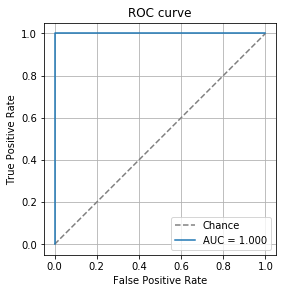

In [533]:
# Plot ROC Curve

fpr, tpr, _ = metrics.roc_curve(deo_y, prediction_deo, pos_label=1)
auc = metrics.roc_auc_score(deo_y, prediction_deo)
legend_string = 'AUC = {:0.3f}'.format(auc)
   
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
plt.plot(fpr, tpr, label=legend_string)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.legend()
plt.tight_layout()
plt.title('ROC curve')
pass

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


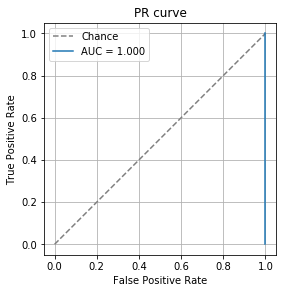

In [694]:
#Plot PR Curve

fpr, tpr, _ = metrics.precision_recall_curve(deo_y, prediction_deo, pos_label=1)
auc = metrics.roc_auc_score(deo_y, prediction_deo)
legend_string = 'AUC = {:0.3f}'.format(auc)
   
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
plt.plot(fpr, tpr, label=legend_string)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.legend()
plt.tight_layout()
plt.title('PR curve')
pass

h) The area under the curve is 1.0, which means the model is at 100% acuracy and that's not very likely. Therefore, I proceed to run PCA for the model.

In [567]:
#run PCA check
#normalize x
from sklearn.preprocessing import StandardScaler
deo_x_normal = StandardScaler().fit_transform(deo_x) 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(deo_x_normal)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [654]:
finalDf = pd.concat([principalDf, deodf[['Instant.Liking']]], axis = 1)


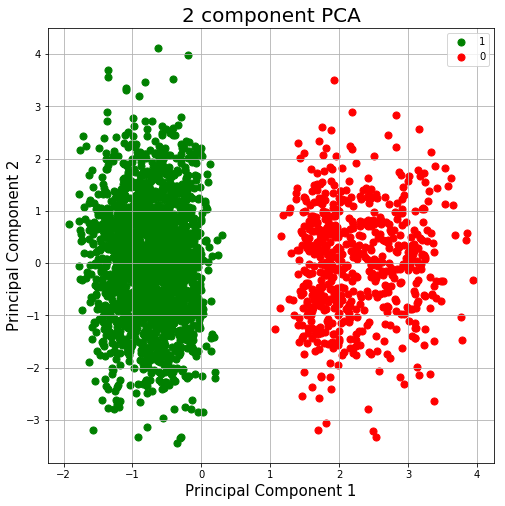

In [576]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

indicesToKeep = finalDf['Instant.Liking'] == pd.Series(np.zeros((2500,)))
ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50,
              c = 'green')

indicesToKeep = finalDf['Instant.Liking'] == pd.Series(np.ones((2500,)))
ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50,
              c = 'red')

ax.legend(targets)
ax.grid()

In [644]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_x, test_x, train_y, test_y = train_test_split(deo_x, deo_y, test_size=1/7.0, random_state=0)

In [651]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_x)
# Apply transform to both the training set and the test set.
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca = pca.fit(train_x)
train_x = pca.transform(train_x)
test_x = pca.transform(test_x)

In [652]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
logPCA = logisticRegr.fit(train_x,train_y)
predPCA = logisticRegr.predict_proba(test_x)[:,1]


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


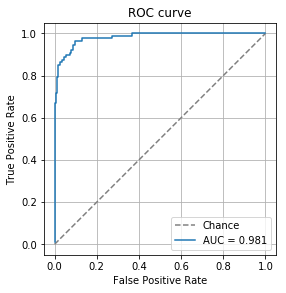

In [653]:
# Plot ROC Curve

fpr, tpr, _ = metrics.roc_curve(test_y, predPCA, pos_label=1)
auc = metrics.roc_auc_score(test_y, predPCA)
legend_string = 'AUC = {:0.3f}'.format(auc)
   
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
plt.plot(fpr, tpr, label=legend_string)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.legend()
plt.tight_layout()
plt.title('ROC curve')
pass

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


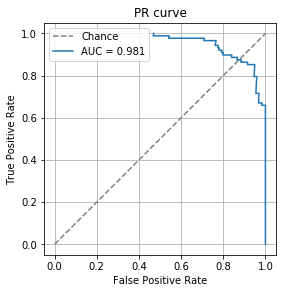

In [693]:
#Plot PR Curve

fpr, tpr, _ = metrics.precision_recall_curve(test_y, predPCA, pos_label=1)
auc = metrics.roc_auc_score(test_y, predPCA)
legend_string = 'AUC = {:0.3f}'.format(auc)
   
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
plt.plot(fpr, tpr, label=legend_string)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.legend()
plt.tight_layout()
plt.title('PR curve')
pass

h) The performance of my model is good, with AUC 0.981, more than 0.75 which is how I defined success. What it performed well is that the logistic model with PCA reduced the dimensionality of features. The features in the data was many and that may be the reason why it is causing overfit and a perfect prediction. However, PCA is not the only way to reduce dimentionality and it causes difficulty in interpretation. Therefore, one area of improvement is to look at other feature selection method for better interpretability. Moreover, logistic model may not be an ideal model for this kind of imbalanced data. Therefore, we can look at other model to treat imbalanced data.

i) The impact of the model is that companies can use this model to predict whether customers will instantly like their new deodorant product or not, based on various features of the deodorant. One takeaway of the model is that there are many features in the model and the dataset tend to be imbalanced, so the company may want to carefully deploy feature selection or use model other than logistic to do the prediction.